In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! kaggle datasets download techsash/waste-classification-data

waste-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'


In [ ]:
import numpy as np
import pandas as pd
import os
import pathlib

# Set the path to the training data
train_dir = '/content/DATASET/TRAIN'


data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.is_dir()]))
class_names = class_names.tolist()
n_classes = len(class_names)
print(class_names, n_classes)


['O', 'R'] 2


In [ ]:
from PIL import Image

dir_dict = {train_dir: "Training", test_dir: "Testing"}

data = []

for type_dir, type_label in dir_dict.items():
    for class_name in class_names:
        target_folder = os.path.join(type_dir, class_name)
        for image_file in os.listdir(target_folder):
            img_path = os.path.join(target_folder, image_file)
            with Image.open(img_path) as img:
                data.append({
                    'class_name': class_name,
                    'type': type_label,
                    'img_path': img_path,
                    'shapes': img.size + (len(img.getbands()),)
                })

df = pd.DataFrame(data)
df.head()

class_name      type                              img_path         shapes
0          O  Training  /content/DATASET/TRAIN/O/O_11222.jpg  (284, 177, 3)
1          O  Training   /content/DATASET/TRAIN/O/O_3346.jpg  (259, 194, 3)
2          O  Training    /content/DATASET/TRAIN/O/O_919.jpg  (300, 168, 3)
3          O  Training   /content/DATASET/TRAIN/O/O_4702.jpg  (300, 168, 3)
4          O  Training  /content/DATASET/TRAIN/O/O_10015.jpg  (299, 168, 3)

In [ ]:
df.class_name.value_counts()

O    13966
R    11111
Name: class_name, dtype: int64

In [ ]:
df.shapes.value_counts()

(225, 225, 3)    4808
(275, 183, 3)    2827
(259, 194, 3)    1904
(300, 168, 3)    1044
(183, 275, 3)     585
                 ... 
(299, 169, 1)       1
(321, 157, 1)       1
(153, 300, 3)       1
(200, 236, 3)       1
(458, 110, 1)       1
Name: shapes, Length: 988, dtype: int64

In [ ]:
# Create separate dataframes for Training and Testing
df_train = df[df['type'] == 'Training']
df_test = df[df['type'] == 'Testing']

df_test.head()

class_name     type                             img_path         shapes
22564          O  Testing  /content/DATASET/TEST/O/O_13220.jpg  (284, 177, 3)
22565          O  Testing  /content/DATASET/TEST/O/O_13183.jpg  (263, 191, 3)
22566          O  Testing  /content/DATASET/TEST/O/O_13495.jpg  (259, 194, 3)
22567          O  Testing  /content/DATASET/TEST/O/O_13245.jpg  (183, 275, 3)
22568          O  Testing  /content/DATASET/TEST/O/O_12774.jpg  (300, 168, 3)

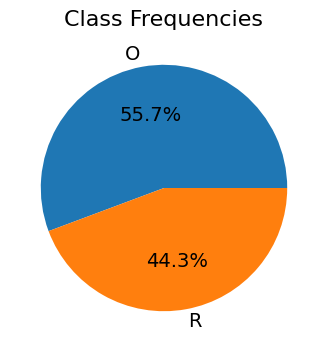

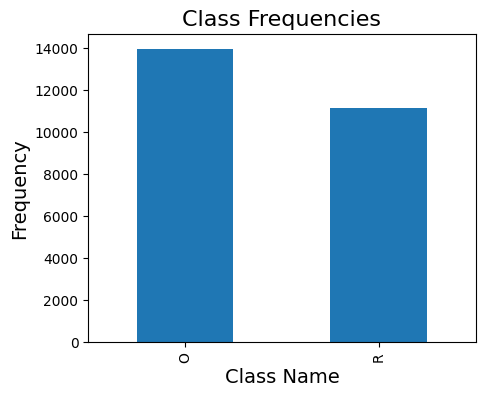

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a pie chart of class frequencies
plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title('Class Frequencies', fontsize=16)
plt.ylabel('')
plt.show()
print()

plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='bar')
plt.title('Class Frequencies', fontsize=16)
plt.xlabel('Class Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import pathlib

train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

# Convert the training path into a Python path and process the data
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.is_dir()]))
class_names = class_names.tolist()
n_classes = len(class_names)

data = []

# Assuming train_dir and test_dir are correctly set to the paths of the training and testing data
dir_dict = {train_dir: "Training", test_dir: "Testing"}

for type_dir, type_label in dir_dict.items():
    for class_name in class_names:
        target_folder = os.path.join(type_dir, class_name)
        for image_file in os.listdir(target_folder):
            img_path = os.path.join(target_folder, image_file)
            with Image.open(img_path) as img:
                data.append({
                    'class_name': class_name,
                    'type': type_label,
                    'img_path': img_path,
                    'shapes': img.size + (len(img.getbands()),)
                })

df = pd.DataFrame(data)

# Now df should have an 'img_path' column
print(df.head())


  class_name      type                              img_path         shapes
0          O  Training  /content/DATASET/TRAIN/O/O_11222.jpg  (284, 177, 3)
1          O  Training   /content/DATASET/TRAIN/O/O_3346.jpg  (259, 194, 3)
2          O  Training    /content/DATASET/TRAIN/O/O_919.jpg  (300, 168, 3)
3          O  Training   /content/DATASET/TRAIN/O/O_4702.jpg  (300, 168, 3)
4          O  Training  /content/DATASET/TRAIN/O/O_10015.jpg  (299, 168, 3)


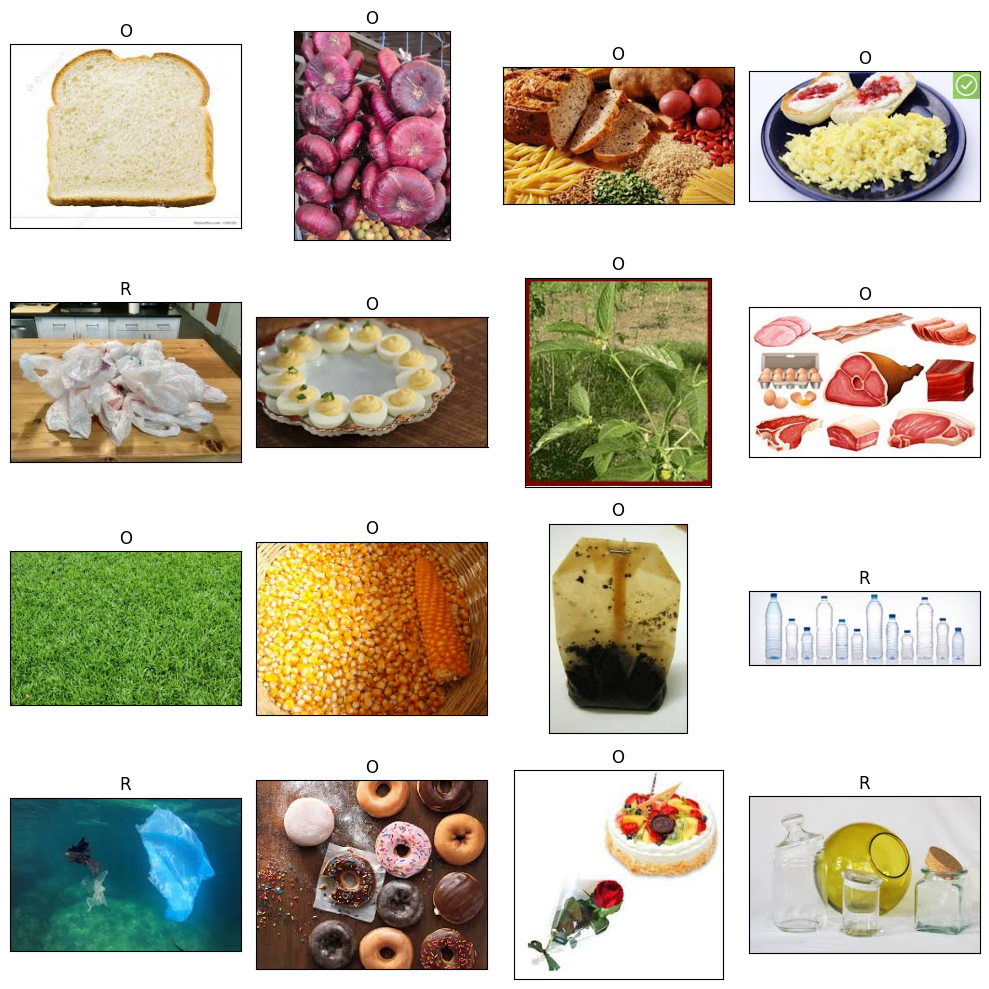

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image_path_column = 'img_path'
class_name_column = 'class_name'

# Display 16 pictures from the dataset
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = df[image_path_column].iloc[random_index[i]]
    ax.imshow(plt.imread(img_path))
    ax.set_title(df[class_name_column].iloc[random_index[i]])

plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)


Index(['class_name', 'type', 'img_path', 'shapes'], dtype='object')


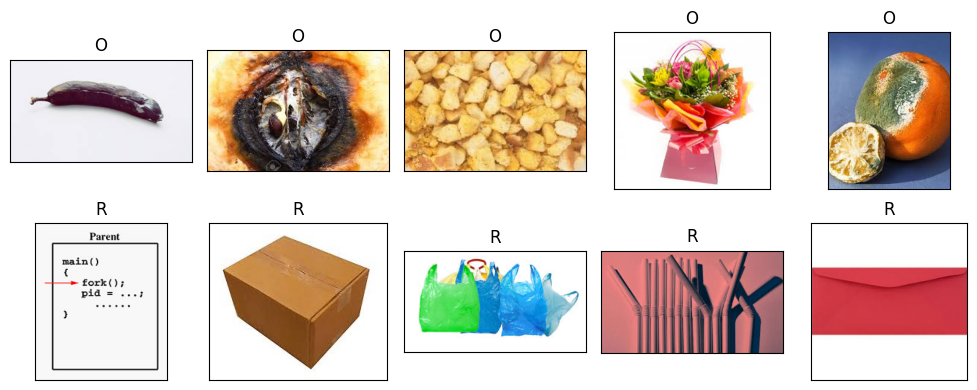

In [ ]:

indices = []


for class_name in df['class_name'].unique():
    class_indices = df[df['class_name'] == class_name].index
    if len(class_indices) >= 5:

        random_indices = np.random.choice(class_indices, 5, replace=False)
    else:

        random_indices = class_indices
    indices.extend(random_indices)

# Plot the selected random images from each class
fig, axes = plt.subplots(nrows=len(indices)//5, ncols=5, figsize=(10, len(indices)//5*2),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.img_path[indices[i]]))
    ax.set_title(df.class_name[indices[i]])
plt.tight_layout()
plt.show()

In [ ]:
train_dir, test_dir

('/content/DATASET/TRAIN', '/content/DATASET/TEST')

In [ ]:
import tensorflow as tf

# Define image size
IMG_SIZE = (224, 224)

# Create a training dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="binary",
    batch_size=32
)

# Normalize training data
train_data = train_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

# Prefetch training data for performance
train_data = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)

# Create a test dataset
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="binary",
)

# Normalize test data
test_data = test_data.map(lambda x, y: (tf.keras.layers.Rescaling(1./255)(x), y))

# Prefetch test data for performance
test_data = test_data.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [ ]:

for images, labels in train_data.take(1):
  print(f"""
  Image shape: {images.shape}
  Image dtype: {images.dtype}
  Target class (tensor form): {labels}
  Label shape: {labels.shape}
  label dtype: {labels.dtype}
        """)


  Image shape: (32, 224, 224, 3)
  Image dtype: <dtype: 'float32'>
  Target class (tensor form): [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]
  Label shape: (32, 1)
  label dtype: <dtype: 'float32'>
        


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2023-12-17 13:58:57--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.207, 142.250.157.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/content/inception_ 100%[===================>]  83.84M  24.0MB/s    in 4.1s    

2023-12-17 13:59:02 (20.5 MB/s) - ‘/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [ ]:

def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  pre_trained_model = InceptionV3(input_shape = (224, 224, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  for layer in pre_trained_model.layers:
      layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)


pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 12, 12, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import concatenate, Flatten, Dense

def build_combined_model(input_shape=(256, 256, 3)):
    # Load pre-trained InceptionV3 model without the top classification layer
    inception = tf.keras.applications.InceptionV3(include_top=False, weights='best.h5', input_shape=input_shape)
    inception.trainable = False  # Optional: freeze InceptionV3 weights

    # Define U-Net model (use the previously defined unet_model function)
    unet = unet_model(input_shape=input_shape)
    unet.trainable = True  # Fine-tune U-Net

    # Define input layer
    inputs = Input(shape=input_shape)

    # Get feature maps from both models
    features_inception = inception(inputs)
    features_unet = unet(inputs)

    # Example of combining features (customize as needed)
    combined_features = concatenate([Flatten()(features_inception), Flatten()(features_unet)])

    # Classification layers
    x = Dense(256, activation='relu')(combined_features)
    outputs = Dense(num_classes, activation='softmax')(x)  # num_classes should be set to the number of your classes

    # Build and compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the combined model
combined_model = build_combined_model()
combined_model.summary()


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

def create_final_model(pre_trained_model, last_output):

  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.2
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(1, activation='sigmoid')(x)

  model = Model(inputs=pre_trained_model.input, outputs=x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])

  return model

In [ ]:

model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 122,223,521 total parameters in this model.
There are 113,248,257 trainable parameters in this model.


In [ ]:
# Create a function to implement a ModelCheckpoint callback with a specific filename
def cc(filepath):
  return tf.keras.callbacks.ModelCheckpoint(filepath,
                                            monitor="val_accuracy",
                                            verbose=1,
                                            save_best_only=True
                                           )

filepath="best.h5"

In [ ]:
ES = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)

In [ ]:
import tensorflow as tf

# Create a function to implement a ModelCheckpoint callback with a specific filename
def cc(filepath):
    return tf.keras.callbacks.ModelCheckpoint(filepath,
                                              monitor="val_accuracy",
                                              verbose=1,
                                              save_best_only=True)

# Define the filepath for the ModelCheckpoint
filepath = "best.h5"


model_checkpoint_callback = cc(filepath)


ES = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20)

# Train the model
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=12,
                    verbose=1,
                    callbacks=[model_checkpoint_callback, ES])


Epoch 1/12
706/706 [==============================] - ETA: 0s - loss: 0.2275 - accuracy: 0.9169
Epoch 1: val_accuracy improved from -inf to 0.84600, saving model to best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


706/706 [==============================] - 1028s 1s/step - loss: 0.2275 - accuracy: 0.9169 - val_loss: 0.4549 - val_accuracy: 0.8460
Epoch 2/12
706/706 [==============================] - ETA: 0s - loss: 0.0978 - accuracy: 0.9675
Epoch 2: val_accuracy improved from 0.84600 to 0.89853, saving model to best.h5
706/706 [==============================] - 1020s 1s/step - loss: 0.0978 - accuracy: 0.9675 - val_loss: 0.3541 - val_accuracy: 0.8985
Epoch 3/12
706/706 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.9817
Epoch 3: val_accuracy did not improve from 0.89853
706/706 [==============================] - 1018s 1s/step - loss: 0.0526 - accuracy: 0.9817 - val_loss: 0.3943 - val_accuracy: 0.8930
Epoch 4/12
706/706 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9905
Epoch 4: val_accuracy improved from 0.89853 to 0.92638, saving model to best.h5
706/706 [==============================] - 1021s 1s/step - loss: 0.0291 - accuracy: 0.9905 - val_loss:

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))


    plt.style.use('seaborn-darkgrid')

    # Plot loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss, label='Training Loss', color='blue', linewidth=2, marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', color='red', linewidth=2, marker='o')
    plt.title('Loss over Epochs', fontsize=18)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, accuracy, label='Training Accuracy', color='green', linewidth=2, marker='o')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', linewidth=2, marker='o')
    plt.title('Accuracy over Epochs', fontsize=18)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


In [ ]:
import tensorflow_hub as hub
model = tf.keras.models.load_model(filepath,
                                         custom_objects={'KerasLayer': hub.KerasLayer})
model.evaluate(test_data)

79/79 [==============================] - 67s 828ms/step - loss: 0.2828 - accuracy: 0.9316


[0.28275856375694275, 0.9315559267997742]

In [ ]:
steps = len(test_data)

y_true = []
y_preds = []
y_probs = []

for i, (images, labels) in enumerate(test_data):
    if i < steps:
        for label in labels:
            y_true.append(label)

        preds = model.predict(images, verbose=1)

        # Store the prediction probabilities
        for pred in preds:
            y_probs.append(pred)

        # round the probabilities to get the class predictions
        for pred in preds:
            y_preds.append(int(round(pred[0])))
    else:
        break

1/1 [==============================] - 1s 1s/step


In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_true,
                 y_pred=y_preds)

array([[1310,   91],
       [  81, 1031]])

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()


  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

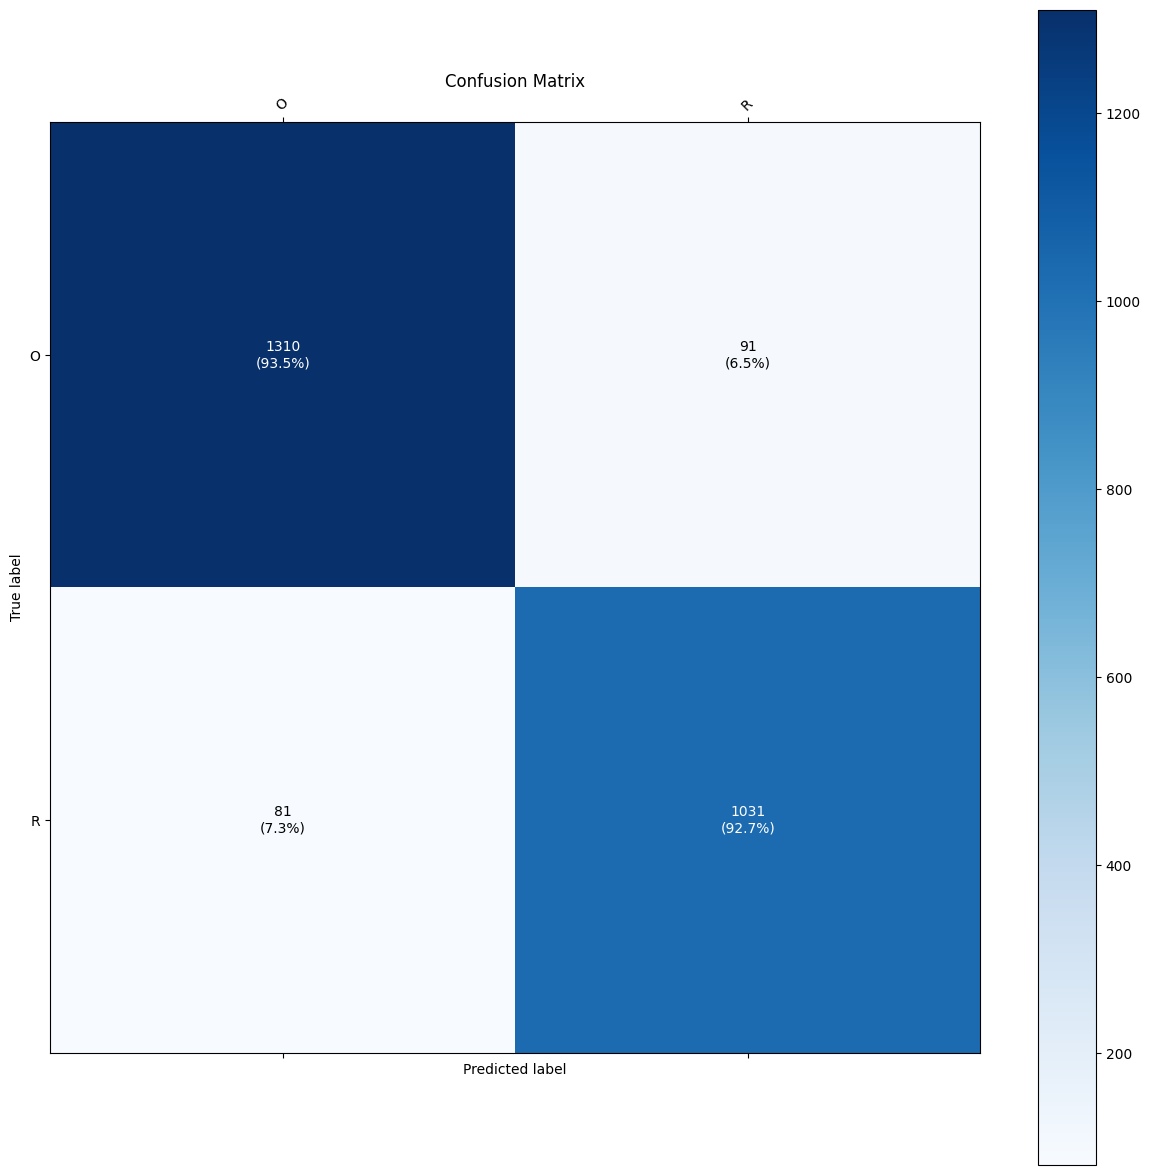

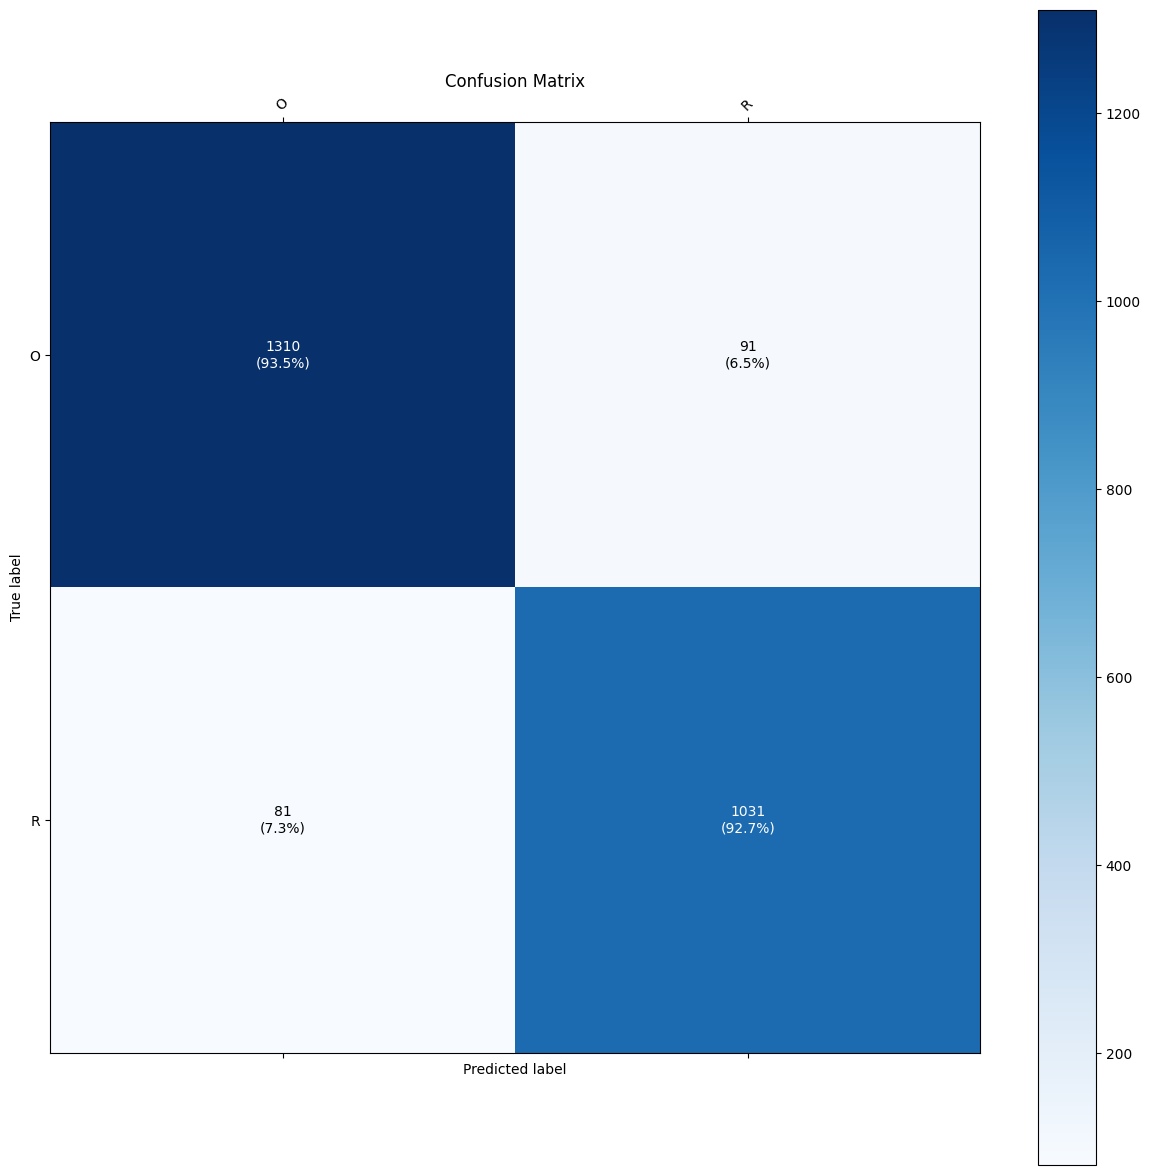

In [ ]:

make_confusion_matrix(y_true=y_true,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)


make_confusion_matrix(y_true, y_preds, classes=class_names, figsize=(15, 15), text_size=10)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_random_images(model, dataset, classes):

    # Pick a random batch
    images, true_labels = next(iter(dataset.shuffle(1000)))

    # Setup 20 random integers
    indices = tf.random.uniform(shape=[20], minval=0, maxval=tf.shape(images)[0], dtype=tf.int32)

    fig, axes = plt.subplots(5, 4, figsize=(10, 10))  # We'll have 5 rows of 4 images each

    for i, ax in enumerate(axes.flat):
        # Create predictions and targets
        target_image = images[indices[i]]
        pred_probs = model.predict(target_image[tf.newaxis, ...], verbose=0)


        num_channels = target_image.shape[-1]

        # Plot the target image
        if num_channels == 1:
            ax.imshow(target_image.numpy().squeeze(), cmap='gray', vmin=0, vmax=1)
        else:
            ax.imshow(target_image.numpy(), vmin=0, vmax=1)

        ax.axis('off')


        if len(classes) > 2:
            pred_label = classes[tf.argmax(pred_probs[0])]
            true_label = classes[tf.argmax(true_labels[indices[i]])]
        else:  # binary classification
            pred_label = classes[int(tf.round(tf.reduce_max(pred_probs[0])))]
            true_label = classes[int(tf.squeeze(true_labels[indices[i]]))]

        # Change the color of the titles depending on if the prediction is right or wrong
        color = "green" if pred_label == true_label else "red"

        # Add xlabel information (prediction/true label)
        ax.set_title("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                            100 * tf.reduce_max(pred_probs),
                                                            true_label),
                     color=color)

    plt.tight_layout()
    plt.show()

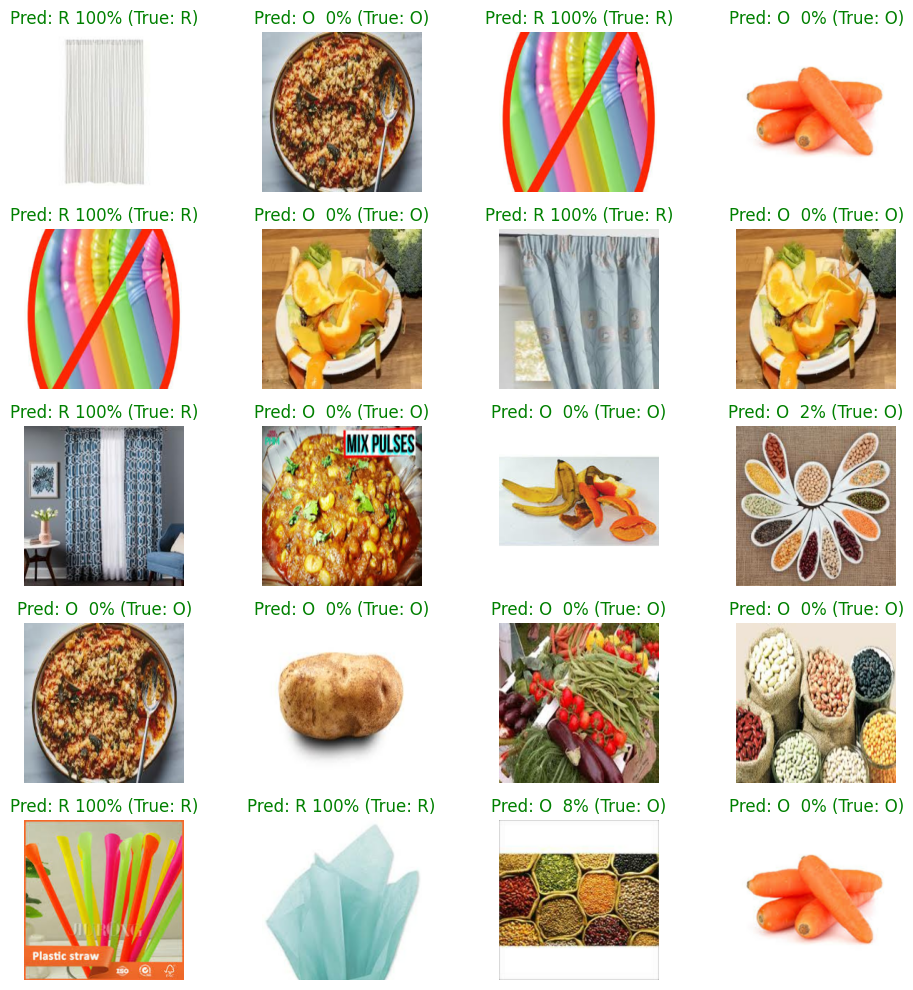

In [ ]:
plot_random_images(model=model,
                   dataset=test_data,
                   classes=class_names)

In [ ]:
incorrect_predictions = []

for i, (images, labels) in enumerate(test_data):
    if i < steps:
        preds = model.predict(images, verbose=1)

        for j, pred in enumerate(preds):
            y_prob = pred
            y_pred = int(round(pred[0]))
            y_true = labels[j]

            y_probs.append(y_prob)
            y_preds.append(y_pred)

            # Check if prediction is incorrect and store the index
            if y_pred != y_true:
                incorrect_predictions.append((images[j], y_true, y_pred))  # Store the image and its actual and predicted labels
    else:
        break

1/1 [==============================] - 0s 434ms/step


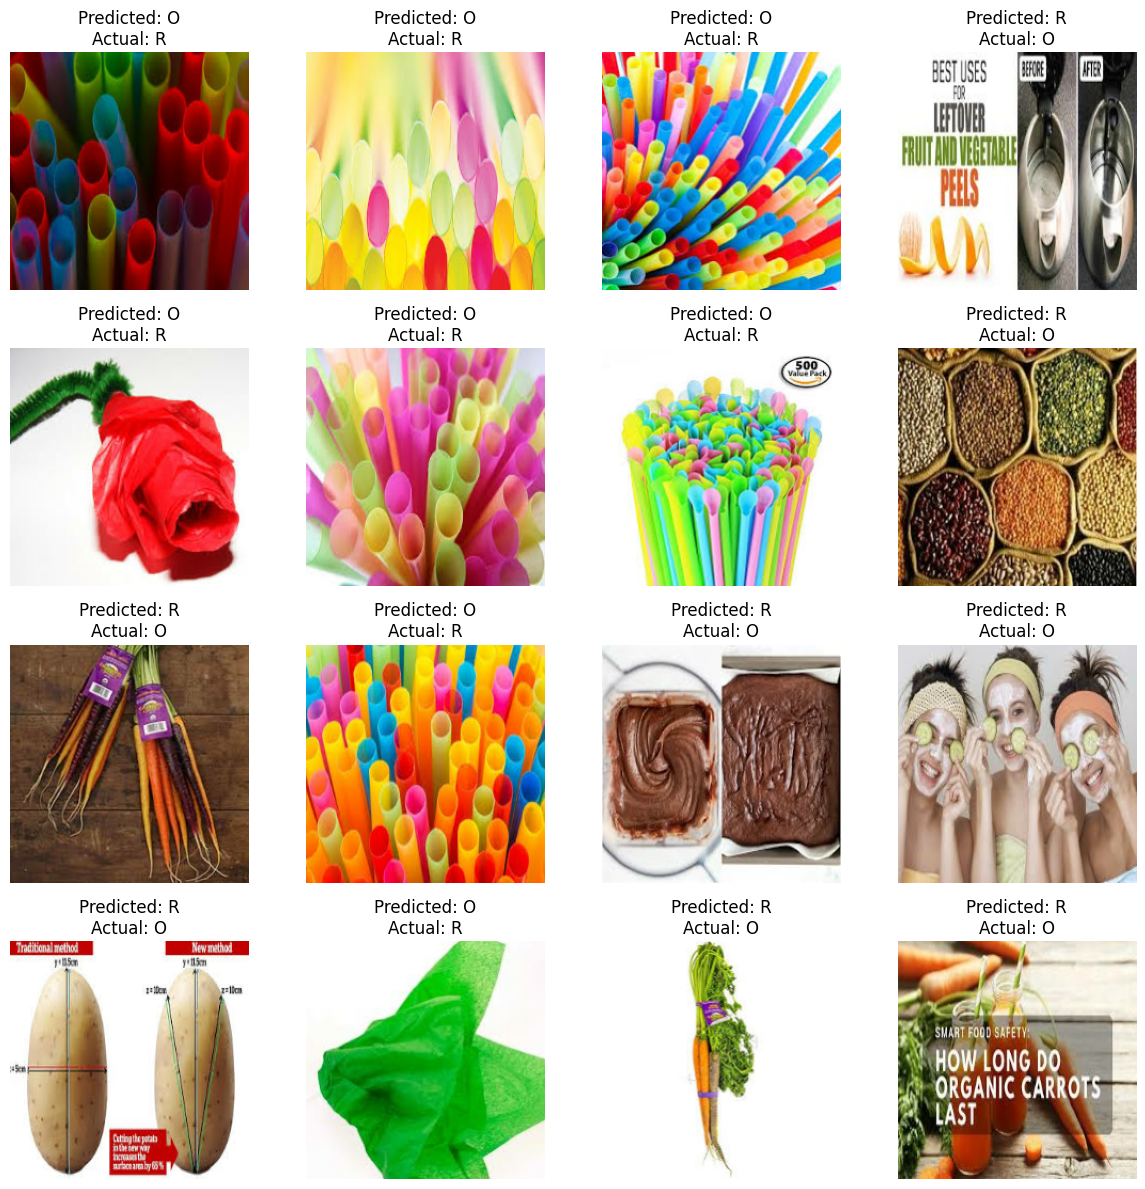

In [ ]:
num_predictions = min(16, len(incorrect_predictions))
num_rows = (num_predictions + 3) // 4  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 4, figsize=(12, 3 * num_rows))  # Create subplots with appropriate size

for i in range(num_predictions):
    incorrect_image, true_label, pred_label = incorrect_predictions[i]
    true_class = class_names[int(true_label)]
    pred_class = class_names[int(pred_label)]

    ax = axes[i // 4, i % 4]  # Select the appropriate subplot

    ax.imshow(incorrect_image)
    ax.set_title(f'Predicted: {pred_class}\nActual: {true_class}')
    ax.axis('off')

plt.tight_layout()
plt.show()